**Objective:** To predict the countries that corresponds to some capitals using word vectors.

In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import utils
%matplotlib inline

In [2]:
data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']
data.head()

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [3]:
word_embeddings = pickle.load(open('word_embeddings_subset.p', 'rb'))
len(word_embeddings)

243

In [4]:
word_embeddings['Spain'].shape[0]

300

In [5]:
def cosine_similarity(A, B):
    dot = np.dot(A, B)
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot / (norma*normb)
    
    return cos

In [6]:
king = word_embeddings['king']
queen = word_embeddings['queen']

cosine_similarity(king, queen)

0.6510957

In [7]:
def euclidean_distance(A, B):
    d = np.linalg.norm(A-B)
    
    return d

In [8]:
euclidean_distance(king, queen)

2.4796925

In [9]:
def get_country(city1, city2, country1, embeddings):
    group = set((city1, country1, city2))
    city_embeddings = word_embeddings[city1]
    country_embeddings= word_embeddings[country1]
    city2_embeddings = word_embeddings[city2]
    
    vec = country_embeddings - city_embeddings + city2_embeddings
    
    similarity = -1
    
    country = ''
    
    for word in embeddings.keys():
        if word not in group:
            word_emb = word_embeddings[word]
            
            cur_similarity = cosine_similarity(vec, word_emb)
            
            if cur_similarity > similarity:
                similarity = cur_similarity
                
                country = (word, similarity)
    return country

In [10]:
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

In [11]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def get_accuracy(word_embeddings, data):
    '''
    Input:
        word_embeddings: a dictionary where the key is a word and the value is its embedding
        data: a pandas dataframe containing all the country and capital city pairs
    
    Output:
        accuracy: the accuracy of the model
    '''

    # initialize num correct to zero
    num_correct = 0

    # loop through the rows of the dataframe
    for i, row in data.iterrows():

        # get city1
        city1 = row['city1']

        # get country1
        country1 = row['country1']

        # get city2
        city2 =  row['city2']

        # get country2
        country2 = row['country2']

        # use get_country to find the predicted country2
        predicted_country2, _ = get_country(city1,city2,country1,word_embeddings)

        # if the predicted country2 is the same as the actual country2...
        if predicted_country2 == country2:
            # increment the number of correct by 1
            num_correct += 1

    # get the number of rows in the data dataframe (length of dataframe)
    m = len(data)

    # calculate the accuracy by dividing the number correct by m
    accuracy = num_correct/m
    return accuracy

In [12]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


In [13]:
def compute_pca(X, n_components=2):
    X_demeaned = X - np.mean(X, axis=0)
    print(f"X_demeaned.shape = {X_demeaned.shape}")
    
    covariance_matrix = np.cov(X_demeaned, rowvar=False)
    
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')
    
    idx_sorted = np.argsort(eigen_vals)
    
    idx_sorted_decreasing = idx_sorted[::-1]
    
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]
    
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing]
    
    eigen_vecs_subset = eigen_vecs_sorted[:, 0:n_components]
    
    X_reduced = np.dot(eigen_vecs_subset.transpose(), X_demeaned.transpose()).transpose()
    
    return X_reduced

In [14]:
# Testing your function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

X_demeaned.shape = (3, 10)
Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


In [19]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = utils.get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


X_demeaned.shape = (11, 300)


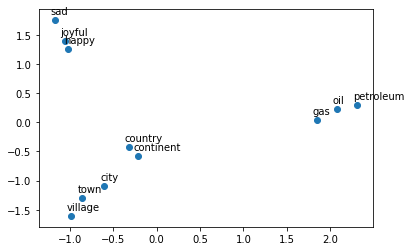

In [20]:
# We have done the plotting for you. Just run this cell.
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()